## Importing Packages

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

## Dataset of round-robin games

In [ ]:
df = pd.read_csv("/work/Wharton_HS_Competition_Soccer_Playoff_Predictions/NSL_regular_season_data_2.csv")

### Without resampling and no feature engineering

The accuracy of the Random Forest Classifier is 0.5244755244755245


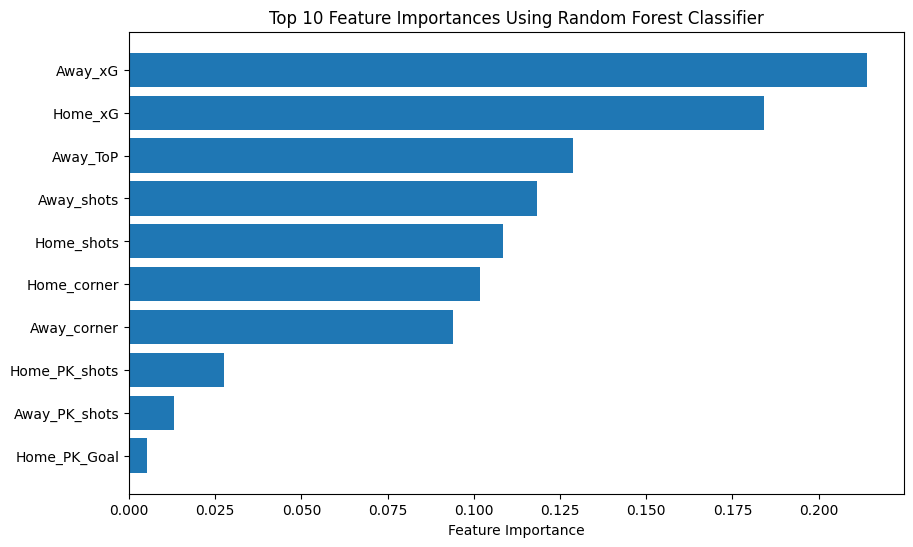

In [ ]:
# Reading the file
df = pd.read_csv("/work/Wharton_HS_Competition_Soccer_Playoff_Predictions/NSL_regular_season_data_2.csv")

wdl = []

# Defining if a team wins, draws, or loses

for index, row in df[['HomeTeam', 'AwayTeam', 'HomeScore', 'AwayScore']].iterrows():
    if row['HomeScore'] > row['AwayScore']:
        wdl.append("1")
    elif row['HomeScore'] < row['AwayScore']:
        wdl.append("-1")
    elif row['HomeScore'] == row['AwayScore']:
        wdl.append("0")
    else:
      print("missing")
    

df[['Result']] = pd.DataFrame(wdl)

df['Away_ToP'] = df.apply(lambda row: 
  row['Home_ToP'] - 1,
  axis=1)
df = df.drop(columns = ['game_id', 'HomeTeam', 'AwayTeam', 'Home_ToP', 'HomeScore', 'AwayScore'])

train,test=train_test_split(df,test_size=0.3,random_state=0,stratify=df['Result'])
train_X=train.drop(columns='Result', axis = -1)
train_Y=train['Result']
test_X=test.drop(columns='Result', axis = -1)
test_Y=test['Result']

feature_names = [f"feature {i}" for i in range(train_X.shape[1])]
modelRFC = RandomForestClassifier(random_state=5)
modelRFC.fit(train_X, train_Y)
pred = modelRFC.predict(test_X)
print('The accuracy of the Random Forest Classifier is',metrics.accuracy_score(pred,test_Y))

def plot_randomForest_feature_importances(model, X, top_n=10, figsize=(10, 6)):

    if not hasattr(model, 'feature_importances_'):
        raise AttributeError("The model does not have the attribute 'feature_importances_'.")

    # Get feature importances from the model
    importances = model.feature_importances_

    # Get indices of the top_n importances
    indices = np.argsort(importances)[-top_n:]

    # Get feature names from the indices
    feature_names = X.columns if hasattr(X, 'columns') else np.arange(X.shape[1])

    # Plotting
    plt.figure(figsize=figsize)
    plt.barh(range(len(indices)), importances[indices], align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Feature Importance')
    plt.title(f'Top {top_n} Feature Importances Using Random Forest Classifier')
    plt.show()
plot_randomForest_feature_importances(modelRFC, train_X)

## problem is you categorize home as one, so you need to actually categorize it team by team

Something that can be done here is duplicating each game. Then, grab each row that's for a specific team into another list

Change so rather than away or home, it's against and for. Add a variable for either home or away

## Creating new dataset

This block duplicates each game so that every two rows is for the same game. This will allow us to analyze from another perspective

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

df = pd.read_csv("/work/Wharton_HS_Competition_Soccer_Playoff_Predictions/data/NSL_regular_season_data_2.csv")

dff = pd.concat([df, df], ignore_index=True)
dff.sort_values(by=dff.columns.tolist(), inplace=True)

dff.reset_index(drop=True, inplace=True)

values = [1, 2] * (len(dff) // 2) + [1] * (len(dff) % 2)
dff['number'] = values

dff


,game_id,HomeTeam,AwayTeam,HomeScore,AwayScore,Home_xG,Away_xG,Home_shots,Away_shots,Home_corner,Away_corner,Home_PK_Goal,Away_PK_Goal,Home_PK_shots,Away_PK_shots,Home_ToP,number
0,game_2023_1,PRO,MAN,1,1,1.63,0.34,17,8,5,4,0,0,0,0,0.53,1
1,game_2023_1,PRO,MAN,1,1,1.63,0.34,17,8,5,4,0,0,0,0,0.53,2
2,game_2023_10,REN,OAK,1,1,0.70,0.17,7,7,4,6,0,0,0,0,0.57,1
3,game_2023_10,REN,OAK,1,1,0.70,0.17,7,7,4,6,0,0,0,0,0.57,2
4,game_2023_100,ANC,DES,2,1,2.71,0.66,26,13,9,5,0,0,0,0,0.53,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,game_2023_97,FAR,TAC,3,0,3.07,0.24,26,17,10,5,0,0,0,0,0.52,2
948,game_2023_98,BAK,MAN,2,1,1.99,0.27,22,9,3,8,0,0,0,0,0.56,1
949,game_2023_98,BAK,MAN,2,1,1.99,0.27,22,9,3,8,0,0,0,0,0.56,2
950,game_2023_99,TAC,CHM,0,2,1.57,1.45,17,9,3,2,0,0,0,0,0.53,1


### More details on the making of the DataFrame

In [ ]:
fd = pd.DataFrame(columns=['Team', 'goalsFor', 'goalsAgainst', 'xGFor', 'xGAgainst',
                           'shotsFor', 'shotsAgainst', 'cornersFor', 'cornersAgainst',
                           'pkFor', 'pkAgainst', 'pkShotsFor', 'pkShotsAgainst', 'possessionPct', 'isHome', 'Result'])
    
for index, row in dff.iterrows():
    if row['number'] == 1:  # Access individual value using row['number']
        fd.at[index, 'Team'] = row['HomeTeam']
        fd.at[index, 'goalsFor'] = row['HomeScore']
        fd.at[index, 'goalsAgainst'] = row['AwayScore']
        fd.at[index, 'xGFor'] = row['Home_xG']
        fd.at[index, 'xGAgainst'] = row['Away_xG']
        fd.at[index, 'shotsFor'] = row['Home_shots']
        fd.at[index, 'shotsAgainst'] = row['Away_shots']
        fd.at[index, 'cornersFor'] = row['Home_corner']
        fd.at[index, 'cornersAgainst'] = row['Away_corner']
        fd.at[index, 'pkFor'] = row['Home_PK_Goal']
        fd.at[index, 'pkAgainst'] = row['Away_PK_Goal']
        fd.at[index, 'pkShotsFor'] = row['Home_PK_shots']
        fd.at[index, 'pkShotsAgainst'] = row['Away_PK_shots']
        fd.at[index, 'possessionPct'] = row['Home_ToP']
        fd.at[index, 'isHome'] = 1 #Team is home

    else:
        fd.at[index, 'Team'] = row['AwayTeam']
        fd.at[index, 'goalsAgainst'] = row['HomeScore']
        fd.at[index, 'goalsFor'] = row['AwayScore']
        fd.at[index, 'xGAgainst'] = row['Home_xG']
        fd.at[index, 'xGFor'] = row['Away_xG']
        fd.at[index, 'shotsAgainst'] = row['Home_shots']
        fd.at[index, 'shotsFor'] = row['Away_shots']
        fd.at[index, 'cornersAgainst'] = row['Home_corner']
        fd.at[index, 'cornersFor'] = row['Away_corner']
        fd.at[index, 'pkAgainst'] = row['Home_PK_Goal']
        fd.at[index, 'pkFor'] = row['Away_PK_Goal']
        fd.at[index, 'pkShotsAgainst'] = row['Home_PK_shots']
        fd.at[index, 'pkShotsFor'] = row['Away_PK_shots']
        fd.at[index, 'possessionPct'] = 1 - row['Home_ToP']
        fd.at[index, 'isHome'] = 0 #Team is away

# Defining a win, loss, or draw

for index, row in fd.iterrows():
    if row['goalsFor'] > row['goalsAgainst']:
        row['Result'] = 1
    elif row['goalsAgainst'] > row['goalsFor']:
        row['Result'] = -1
    elif row['goalsFor'] == row['goalsAgainst']:
        row['Result'] = 0


### Model for Training

The accuracy of the Random Forest Classifier is 0.46853146853146854


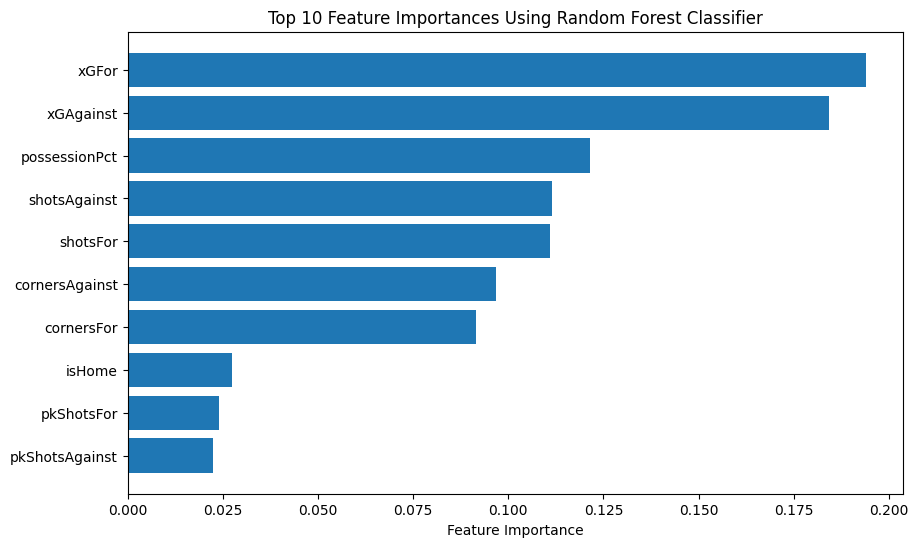

In [ ]:
fdModel = fd.drop(columns = ['Team', 'goalsFor', 'goalsAgainst'])

train,test=train_test_split(fdModel,test_size=0.3,random_state=0,stratify=fdModel['Result'])
train_X=train.drop(columns='Result', axis = -1)
train_Y=train['Result']
test_X=test.drop(columns='Result', axis = -1)
test_Y=test['Result']

feature_names = [f"feature {i}" for i in range(train_X.shape[1])]
modelRFC = RandomForestClassifier(random_state=5)
train_Y=train_Y.astype('int')
test_Y=test_Y.astype('int')
modelRFC.fit(train_X, train_Y)
pred = modelRFC.predict(test_X)
print('The accuracy of the Random Forest Classifier is',metrics.accuracy_score(pred,test_Y))

def plot_randomForest_feature_importances(model, X, top_n=10, figsize=(10, 6)):

    if not hasattr(model, 'feature_importances_'):
        raise AttributeError("The model does not have the attribute 'feature_importances_'.")

    # Get feature importances from the model
    importances = model.feature_importances_

    # Get indices of the top_n importances
    indices = np.argsort(importances)[-top_n:]

    # Get feature names from the indices
    feature_names = X.columns if hasattr(X, 'columns') else np.arange(X.shape[1])

    # Plotting
    plt.figure(figsize=figsize)
    plt.barh(range(len(indices)), importances[indices], align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Feature Importance')
    plt.title(f'Top {top_n} Feature Importances Using Random Forest Classifier')
    plt.show()
plot_randomForest_feature_importances(modelRFC, train_X)

### Creating a resampled dataset

In [ ]:
team_0 = fd[fd['Result'] == -1]
team_1 = fd[fd['Result'] == 1]
team_2 = fd[fd['Result'] == 0]
samples = 1000
team_0_resampled = team_0.sample(samples, replace=True)
team_1_resampled = team_1.sample(samples, replace=True)
team_2_resampled = team_2.sample(samples, replace=True)

team = pd.concat([team_0_resampled, team_1_resampled, team_2_resampled], axis=0)
print(team['Result'].value_counts())

 0    1000
 1    1000
-1    1000
Name: Result, dtype: int64


### Training the model on the resampled data

The accuracy of the Random Forest Classifier is 0.9566666666666667


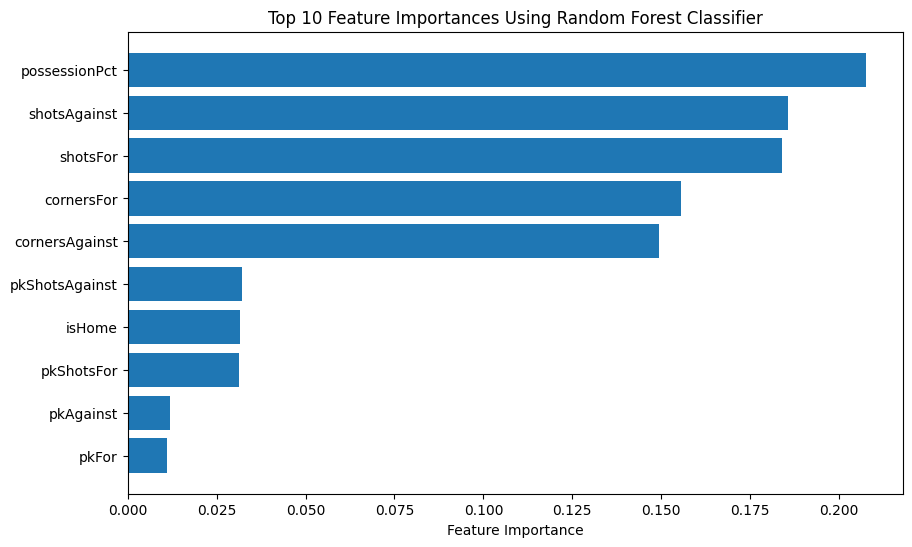

In [ ]:
resampleModel = team.drop(columns = ['Team', 'goalsFor', 'goalsAgainst', 'xGFor', 'xGAgainst'])

train,test=train_test_split(resampleModel,test_size=0.3,random_state=0,stratify=resampleModel['Result'])
train_X=train.drop(columns='Result', axis = -1)
train_Y=train['Result']
test_X=test.drop(columns='Result', axis = -1)
test_Y=test['Result']

feature_names = [f"feature {i}" for i in range(train_X.shape[1])]
modelRFC = RandomForestClassifier(random_state=5)
train_Y=train_Y.astype('int')
test_Y=test_Y.astype('int')
modelRFC.fit(train_X, train_Y)
pred = modelRFC.predict(test_X)
print('The accuracy of the Random Forest Classifier is',metrics.accuracy_score(pred,test_Y))

def plot_randomForest_feature_importances(model, X, top_n=10, figsize=(10, 6)):

    if not hasattr(model, 'feature_importances_'):
        raise AttributeError("The model does not have the attribute 'feature_importances_'.")

    # Get feature importances from the model
    importances = model.feature_importances_

    # Get indices of the top_n importances
    indices = np.argsort(importances)[-top_n:]

    # Get feature names from the indices
    feature_names = X.columns if hasattr(X, 'columns') else np.arange(X.shape[1])

    # Plotting
    plt.figure(figsize=figsize)
    plt.barh(range(len(indices)), importances[indices], align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Feature Importance')
    plt.title(f'Top {top_n} Feature Importances Using Random Forest Classifier')
    plt.show()
plot_randomForest_feature_importances(modelRFC, train_X)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=88f980d1-d3ce-4172-98a4-1408c342c23b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>